# World Happiness Report 2018

## LIBRARIES

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import itertools as itools
pd.options.display.max_columns = None

## IMPORT DATA

In [3]:
data = pd.read_excel("WHR2018Chapter2OnlineData.xls")

print(data.info())
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1562 entries, 0 to 1561
Data columns (total 19 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   country                                                   1562 non-null   object 
 1   year                                                      1562 non-null   int64  
 2   Life Ladder                                               1562 non-null   float64
 3   Log GDP per capita                                        1535 non-null   float64
 4   Social support                                            1549 non-null   float64
 5   Healthy life expectancy at birth                          1553 non-null   float64
 6   Freedom to make life choices                              1533 non-null   float64
 7   Generosity                                                1482 non-null   float64
 8   Perceptions of cor

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
count,1562.000000,1562.000000,1535.000000,1549.000000,1553.000000,1533.000000,1482.000000,1472.000000,1544.000000,1550.000000,1401.000000,1391.000000,1391.000000,1562.000000,1562.000000,583.000000,1386.000000,1205.000000
mean,2011.820743,5.433676,9.220822,0.810669,62.249887,0.728975,0.000079,0.753622,0.708969,0.263171,0.480207,-0.126617,0.004947,2.003501,0.387271,0.372846,0.386948,0.445204
std,3.419787,1.121017,1.184035,0.119370,7.960671,0.145408,0.164202,0.185538,0.107644,0.084006,0.190724,0.873259,0.981052,0.379684,0.119007,0.086609,0.083694,0.105410
min,2005.000000,2.661718,6.377396,0.290184,37.766476,0.257534,-0.322952,0.035198,0.362498,0.083426,0.068769,-2.448228,-2.144974,0.863034,0.133908,0.241000,0.228833,0.223470
25%,2009.000000,4.606351,8.310665,0.748304,57.299580,0.633754,-0.114313,0.697359,0.621471,0.204116,0.334732,-0.772010,-0.717463,1.737934,0.309722,0.307000,0.321583,0.368531
50%,2012.000000,5.332600,9.398610,0.833047,63.803192,0.748014,-0.022638,0.808115,0.717398,0.251798,0.463137,-0.225939,-0.210142,1.960345,0.369751,0.349000,0.371000,0.425395
75%,2015.000000,6.271025,10.190634,0.904329,68.098228,0.843628,0.094649,0.880089,0.800858,0.311515,0.610723,0.665944,0.717996,2.215920,0.451833,0.433500,0.433104,0.508579
max,2017.000000,8.018934,11.770276,0.987343,76.536362,0.985178,0.677773,0.983276,0.943621,0.704590,0.993604,1.540097,2.184725,3.527820,1.022769,0.648000,0.626000,0.961435


### Prepare data

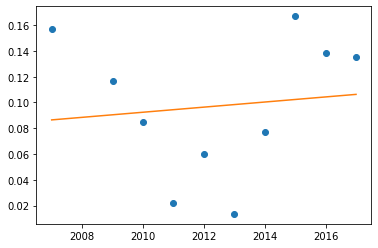

In [4]:
def GetColumnData(Country:str, Columns : list)->np.ndarray:
    temp = data.loc[data['country'] == Country][Columns].dropna()
    return {col : value.values for col, value in zip(Columns, [temp[col] for col in temp.columns])}


gdata = GetColumnData('Germany', ['year', 'Generosity'])
slope, intercept, *rest  = stats.stats.linregress(gdata['year'], gdata['Generosity'])

plt.plot(gdata['year'], gdata['Generosity'], 'o')

plt.plot(gdata['year'], intercept + slope * gdata['year'])


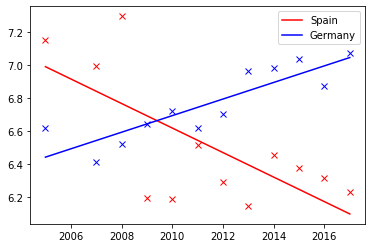

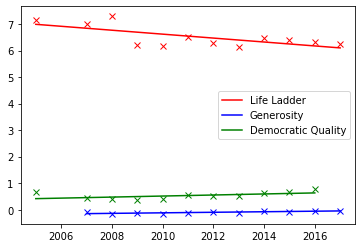

In [5]:
def _ShowLineRegression(Country: str, Column: str, c, countrylegend):
    cdata = GetColumnData(Country, ['year', Column])
    if countrylegend:
        label = Country
    else:
        label = Column
    slope, intercept, *rest  = stats.stats.linregress(cdata['year'], cdata[Column])
    plt.plot(cdata['year'], cdata[Column], 'x' , c=c)
    plt.plot(cdata['year'], intercept + cdata['year'] * slope, c=c, label=label)

def ShowLineRegression(Country: str, Column: str, c:str, countrylegend = True):
    _ShowLineRegression(Country, Column, c, countrylegend)
    plt.legend()
    plt.show()


def ShowLineRegression_MultiCountry(Country:list, Column:str, c:list):
    if(c == None):
        c = itools.count(start=0)
    for country, color in zip(Country, c):
        _ShowLineRegression(country, Column, color, True)
    plt.legend()
    plt.show()

def ShowLineRegression_MultiColumn(Country:str, Column:list, c:list):
    for column, color in zip(Column, c):
        _ShowLineRegression(Country, column, color, False)
    plt.legend()
    plt.show()
    
ShowLineRegression_MultiCountry(['Spain', 'Germany'], 'Life Ladder', ['r', 'b'])
ShowLineRegression_MultiColumn('Spain', ['Life Ladder', 'Generosity', 'Democratic Quality'], ['r', 'b', 'g'])